Señales disponibles:
1: Nueva Señal 1 (n=-5..14, con x[0] = -4 en n=0)
2: Señal 2 (Piecewise en n=-10..10)

Métodos disponibles: ['ceros', 'escalon', 'lineal']

Valores sugeridos de M: [2, 3, 4, 0.5, 0.25]

Desplazamientos sugeridos: [1, 2, 3, -1, -2, -3, 0]


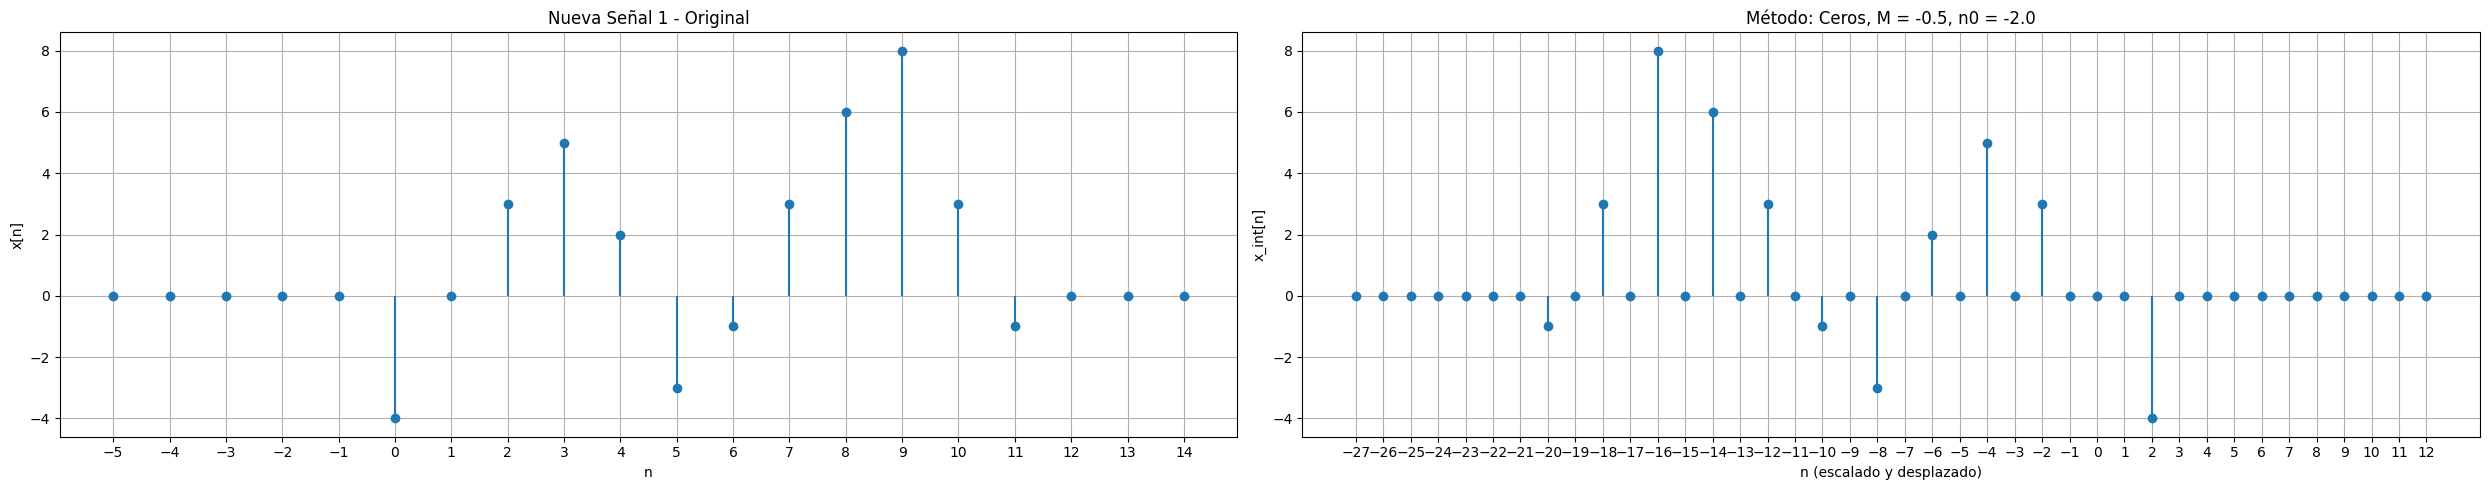

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# =========================================================
# 1) DEFINICIÓN DE LAS SEÑALES
# =========================================================

def senal1():
    """
    Nueva Señal 1:
    n = -5..14 (20 muestras)
    x[n] = {0, 0, 0, 0, 0, -4, 0, 3, 5, 2, -3, -1, 3, 6, 8, 3, -1, 0, 0, 0}
    con x[0] = -4  (n=0 corresponde al sexto valor)
    """
    n = np.arange(-5, 15)  # Genera 20 muestras: -5, -4, ..., 14
    x_n = np.array([
        0, 0, 0, 0, 0,  # n = -5, -4, -3, -2, -1
        -4,             # n = 0
        0, 3, 5, 2, -3, -1, 3, 6, 8, 3, -1, 0, 0, 0
    ], dtype=float)
    return n, x_n

def senal2():
    """
    Señal 2 (Piecewise):
    n = -10..10
    x[n] = 0 para n <= -6 y n >= 6
           (3/4)^n para -5 <= n <= 0
           (7/4)^n para  1 <= n <= 5
    """
    def x_discreta(n):
        x_out = []
        for val in n:
            if -10 <= val <= -6:
                x_out.append(0)
            elif -5 <= val <= 0:
                x_out.append((3/4)**val)
            elif 1 <= val <= 5:
                x_out.append((7/4)**val)
            elif 6 <= val <= 10:
                x_out.append(0)
            else:
                x_out.append(0)
        return np.array(x_out, dtype=float)
    n = np.arange(-10, 11)
    x_n = x_discreta(n)
    return n, x_n

# =========================================================
# 2) FUNCIONES DE INTERPOLACIÓN
# =========================================================

def interp_ceros(x, factor):
    """
    Interpolación por ceros:
    Inserta (factor - 1) ceros entre cada muestra.
    """
    N = len(x)
    L = N * factor
    y = np.zeros(L)
    for i in range(N):
        y[i * factor] = x[i]
    return y

def interp_escalon(x, factor):
    """
    Interpolación por escalón:
    Repite cada muestra 'factor' veces.
    """
    N = len(x)
    L = N * factor
    y = np.zeros(L)
    idx = 0
    for i in range(N):
        for _ in range(factor):
            y[idx] = x[i]
            idx += 1
    return y

def interp_lineal(x, factor):
    """
    Interpolación lineal:
    Inserta (factor - 1) puntos equiespaciados entre cada par de muestras consecutivas.
    """
    N = len(x)
    L = (N - 1) * factor + 1
    y = np.zeros(L)
    pos = 0
    for i in range(N - 1):
        y[pos] = x[i]
        paso = (x[i+1] - x[i]) / factor
        for k in range(1, factor):
            y[pos + k] = x[i] + k * paso
        pos += factor
    y[-1] = x[-1]
    return y

# =========================================================
# 3) SELECCIÓN DE SEÑAL, MÉTODO, FACTOR Y DESPLAZAMIENTO
# =========================================================

print("Señales disponibles:")
print("1: Nueva Señal 1 (n=-5..14, con x[0] = -4 en n=0)")
print("2: Señal 2 (Piecewise en n=-10..10)")
senal_opcion = input("Elige la señal a operar (1 o 2): ").strip()

if senal_opcion == "2":
    n, x_n = senal2()
    titulo_senal = "Señal 2 (Piecewise)"
else:
    n, x_n = senal1()
    titulo_senal = "Nueva Señal 1"

metodos_disponibles = ["ceros", "escalon", "lineal"]
print("\nMétodos disponibles:", metodos_disponibles)
metodo = input("Elige método de interpolación: ").strip().lower()
if metodo not in metodos_disponibles:
    print("Método inválido. Se usará 'ceros' por defecto.")
    metodo = "ceros"

M_sugeridos = [2, 3, 4, 0.5, 0.25]
print("\nValores sugeridos de M:", M_sugeridos)
try:
    M = float(input("Elige un valor de M (puede ser diferente a los sugeridos): "))
except:
    M = 2
    print("Entrada inválida. Se usará M = 2 por defecto.")

despl_sugeridos = [1, 2, 3, -1, -2, -3, 0]
print("\nDesplazamientos sugeridos:", despl_sugeridos)
try:
    n0 = float(input("Elige un desplazamiento (n0) (puede ser diferente a los sugeridos): "))
except:
    n0 = 0
    print("Entrada inválida. Se usará n0 = 0 por defecto.")

# =========================================================
# 4) INTERPOLACIÓN DE LA SEÑAL
# =========================================================

# Se usa el valor absoluto de M para determinar el factor
if abs(M) >= 1:
    factor = int(round(abs(M)))
else:
    factor = int(round(1 / abs(M)))

if metodo == "ceros":
    x_int = interp_ceros(x_n, factor)
elif metodo == "escalon":
    x_int = interp_escalon(x_n, factor)
else:  # "lineal"
    x_int = interp_lineal(x_n, factor)

L = len(x_int)

# =========================================================
# 5) CONSTRUIMOS EL NUEVO EJE DE TIEMPO ESCALADO Y DESPLAZADO
# =========================================================
# Se parte de n[0] y se genera un eje de tiempo interpolado con incremento de 1/factor:
n_out = n[0] + np.arange(L) / factor

# Se escala el eje por 1/M (lo que invierte o comprime según M) y se aplica el desplazamiento:
n_out = n_out / M - n0

# =========================================================
# 6) GRAFICAMOS LAS SEÑALES
# =========================================================

plt.figure(figsize=(25, 5))

# Subplot 1: Señal original
plt.subplot(1, 2, 1)
plt.stem(n, x_n, basefmt=" ")
plt.title(f"{titulo_senal} - Original")
plt.xticks(np.arange(n[0], n[-1] + 1, 1))
plt.xlabel("n")
plt.ylabel("x[n]")
plt.grid(True)

# Subplot 2: Señal interpolada y escalada
plt.subplot(1, 2, 2)
plt.stem(n_out, x_int, basefmt=" ")
plt.title(f"Método: {metodo.capitalize()}, M = {M}, n0 = {n0}")

# Generamos 10 ticks en el rango de n_out y los mostramos con dos decimales.
n_min = int(np.floor(np.min(n_out)))
n_max = int(np.ceil(np.max(n_out)))
plt.xticks(np.arange(n_min, n_max + 1, 1))
plt.xlabel("n (escalado y desplazado)")
plt.ylabel("x_int[n]")
plt.grid(True)

plt.tight_layout()
plt.show()
